## - 데이터 살펴보기
## - 결측치 확인과 처리(교재 PART5의  1절)
## - 중복행 제거(교재 PART5의 2절)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# 예제 5-1
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# deck 열의 NaN 개수 계산하기
nan_deck = df['deck'].value_counts(dropna=False) 
print(nan_deck)

In [ ]:
# isnull() 메서드로 누락 데이터 찾기
print(df.head().isnull())

In [ ]:
# notnull() 메서드로 누락 데이터 찾기
print(df.head().notnull())

In [ ]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.head().isnull().sum(axis=0))

In [ ]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.isnull().sum(axis=0))

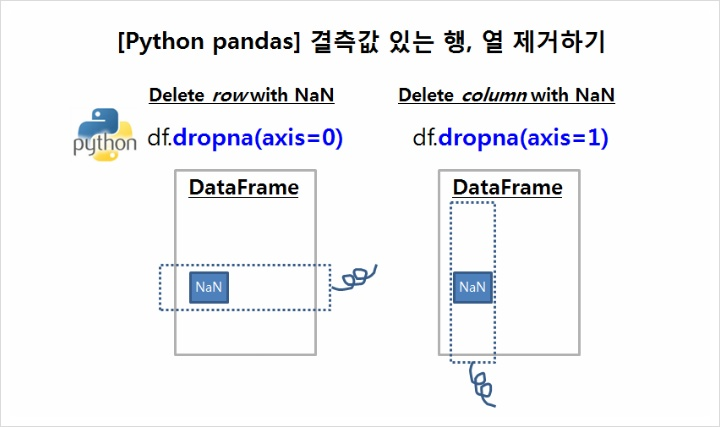

In [ ]:
# 예제 5-2
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# for 반복문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
print(missing_df)

In [ ]:
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()    # 각 열의 NaN 개수 파악
    try: 
        print(col, ': ', missing_count[True])   # NaN 값이 있으면 개수를 출력
    except:
        print(col, ': ', 0)                     # NaN 값이 없으면 0개 출력
        
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)  
print(df_thresh.columns)

In [ ]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df_age))

In [ ]:
# 예제 5-3
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
print(df['age'].head(10))
print('\n')

# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'].fillna(mean_age, inplace=True)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
print(df['age'].head(10))

In [ ]:
# 예제 5-4
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

In [ ]:
df['embark_town'].value_counts(dropna=True)

In [ ]:
# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

In [ ]:
df['embark_town'].fillna(most_freq, inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df['embark_town'][825:830])

In [ ]:
# 예제 5-5
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

In [ ]:
# embark_town 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
df['embark_town'].fillna(method='ffill', inplace=True)
print(df['embark_town'][825:830])

In [ ]:
# 예제 5-6
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)
print('\n')

# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()
print(col_dup)

In [ ]:
# 예제 5-7
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

In [ ]:
# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)
print('\n')

In [ ]:
# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)

### Seaborn 패키지에서 제공하는 타이타닉 데이터셋

1. survived - 생존 여부, 0이면 사망, 1이면 생존
2. pclass - 객실 등급, 1이면 1등급, 2이면 2등급, 3이면 3등급
3. sex - 성별, male이면 남자, female이면 여자
4. age - 나이
5. sibsp - 함께 탑승한 형제 및 배우자 수
6. parch - 함께 탑승한 자녀 및 부모 수
7. fare - 요금
8. embarked - 탑승지 이름 앞글자, C는 Cherbourg, Q는 Queenstown, S는 Southampton
9. class - 객실 등급, First면 1등급, Second면 2등급, Third면 3등급
10. who - 남자, 여자, 아이(man, woman, child
11. adult_male - 성인 남자인지 여부, True면 성인 남자, False면 그외
12. deck - 선실 번호 첫 알파벳(A, B, C, D, E, F, G)
13. embark_town - 탑승지 이름(Cherbourg, Queenstown, Southampton)
14. alive - 생존여부(no면 사망, yes면 생존)
15. alone - 혼자 탑승했는지 여부, True면 혼자 탑승, False면 가족과 함께 탑승

 

In [ ]:
# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df.head()

In [ ]:
print(df.info()) 

In [ ]:
# deck 열의 NaN 개수 계산하기
nan_deck = df['deck'].value_counts(dropna=False) 
print(nan_deck)

In [ ]:
# isnull() 메서드로 누락 데이터 찾기
print(df.head().isnull())

In [ ]:
# notnull() 메서드로 누락 데이터 찾기
print(df.head().notnull())

In [ ]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.isnull().sum(axis=0))

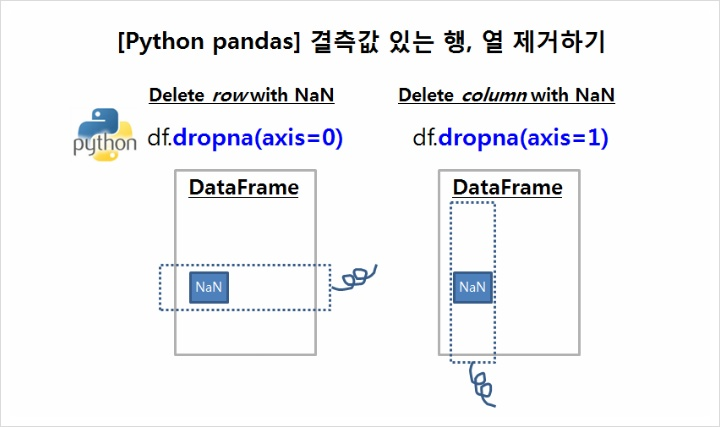

In [ ]:
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)  
print(df_thresh.columns)

In [ ]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df_age))

In [ ]:
# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
print(df['age'].head(10))

In [ ]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'].fillna(mean_age, inplace=True)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
print(df['age'].head(10))

In [ ]:
# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

In [ ]:
df1 = df.copy()

In [ ]:
df1['embark_town'].value_counts(dropna=True)

In [ ]:
# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df1['embark_town'].value_counts(dropna=True).idxmax()   
print(most_freq)

In [ ]:
df1['embark_town'].fillna(most_freq, inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df1['embark_town'][825:830])

In [ ]:
# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

In [ ]:
df2 = df.copy()

In [ ]:
# embark_town 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
df2['embark_town'].fillna(method='ffill', inplace=True) # bfill
print(df2['embark_town'][825:830])

In [ ]:
import pandas as pd
bank_df = pd.read_csv('data/bank.csv')
bank_df.head()

In [ ]:
# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

# 데이터형을 확인
print(bank_df.dtypes)

In [ ]:
# 데이터에 대한 여러가지 정보들을 한번에 출력
bank_df.info()

In [ ]:
# 기술 통계량 확인
bank_df.describe()

In [ ]:
bank_df.isna().sum() 

In [ ]:
bank_df.isna()

In [ ]:
import seaborn as sns
sns.heatmap(bank_df.isna(), cbar=True)

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno 
msno.matrix(bank_df, figsize=(12,5), sparkline=False)

In [ ]:
msno.matrix?

In [ ]:
msno.bar(bank_df, figsize=(12,5))

### 결측치를 포함한 행 삭제

In [ ]:
# job과 education 열에서 결측치가 포함된 행을 삭제
bank_df = bank_df.dropna(subset=['job', 'education'])

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

In [ ]:
msno.bar(bank_df, figsize=(12,5))

### 결측치를 2400개이상 포함한 열 삭제

In [ ]:
# 결측치이 2400개 이상인 열을 제외
bank_df = bank_df.dropna(thresh=2400, axis=1) # axis 중요!!!

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)
print(bank_df.info())

In [ ]:
msno.bar(bank_df, figsize=(12,5))

### 결측치 채우기

In [ ]:
# 결측치을 「unknown」으로 치환
bank_df = bank_df.fillna({'contact':'unknown'})

# 선두에서 5행까지 표시
bank_df.head()

In [ ]:
msno.bar(bank_df, figsize=(12,5))

In [ ]:
import numpy as np
time_index = pd.date_range("2022-01-01", periods=5, freq="MS")
print(time_index)

In [ ]:
dataframe = pd.DataFrame(index=time_index)

dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
dataframe

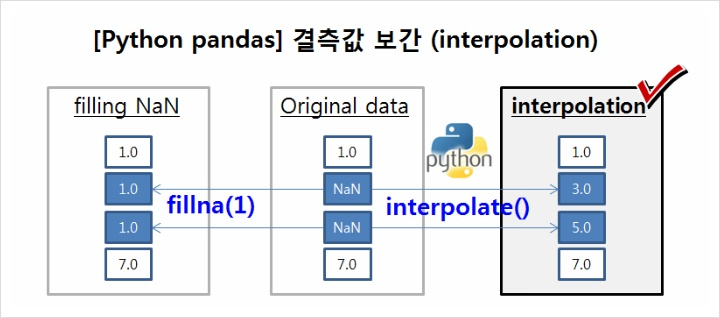

In [ ]:
# 누락된 값을 보간합니다.
dataframe.interpolate()

In [ ]:
# 앞쪽으로 채우기(Forward-fill)
dataframe.ffill()

In [ ]:
dataframe.fillna(method ='ffill') 

In [ ]:
# 뒤쪽으로 채우기(Back-fill)
dataframe.bfill()

In [ ]:
dataframe.fillna(method ='bfill') 

In [ ]:
dict = {'One' :  [np.nan, np.nan, 95, 80], 
    'Two' : [np.nan, np.nan, np.nan, np.nan], 
    'Three':[52, np.nan, 80, 98], 
    'Four':[np.nan, np.nan, np.nan, 65],
    'Five':[10, None, 30, 40],
    'Six': [np.nan, np.nan, np.nan, pd.NaT],
    'Seven': [np.nan, np.nan, None, np.nan],
    'Eight': [np.nan, np.nan, None, pd.NaT]} 

df = pd.DataFrame(dict)
display(df)

In [ ]:
df.dropna(how = 'all') 

In [ ]:
df.dropna(how = 'all', axis=1) 

In [ ]:
df.dropna(subset=['One', 'Four'])

In [ ]:
df.dropna(subset=['Eight'])

In [ ]:
df.isna()

In [ ]:
df.isna().sum()

In [ ]:
dict = {'First Score':[100, 90, None, 95, 85], 
        'Second Score': [30, 45, None, np.nan, 60], 
        'Third Score':[np.nan, 40, np.nan, 80, None]} 
df = pd.DataFrame(dict) 
display(df)

In [ ]:
df.isna()

In [ ]:
df.fillna(0) 

In [ ]:
df.fillna(method ='ffill') 

In [ ]:
df.fillna(method ='bfill')  

In [ ]:
df.replace(to_replace = np.nan, value = -50)

In [ ]:
df.interpolate(limit_direction ='forward') 

In [ ]:
df.interpolate(limit_direction ='backward') 

In [ ]:
df.interpolate(limit_direction ='both') 

---
### 중복행 채크와 제거

In [ ]:
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)

In [ ]:
# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)

In [ ]:
# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()
print(col_dup)

In [ ]:
# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)

In [ ]:
# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)

---

### auto-mpg.csv 의 설명
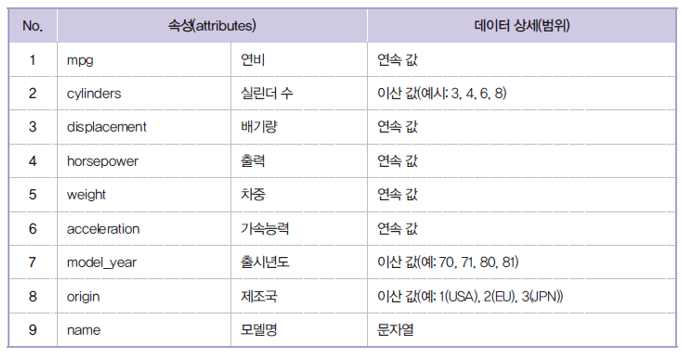

In [ ]:
import pandas as pd
# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)
# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
print(df.head(3))    

In [ ]:
print(df.dtypes)   

In [ ]:
# horsepower 열의 고유값 확인
print(df['horsepower'].unique())
print('\n')

### 타입 변환

In [ ]:
# 누락 데이터('?') 삭제 
import numpy as np
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 자료형 확인
print(df['horsepower'].dtypes)  

---